<font style="font-family: Arial; font-size:2.25em;color:brown; font-style:bold">
Lab 6 -- Visualization </font> <font style="font-family: Arial; font-size:1.5em;font-style:bold">(15 pts) </font>
    


In [6]:
import pandas as pd

 **1.	(2 pt) Read the `titanic.csv` file into a dataframe and show first three rows. Display names of all index and column names.** 

In [8]:
file='Lab6_Data/titanic.csv'
titanic_df=pd.read_csv(file)
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [9]:
titanic_df.index

RangeIndex(start=0, stop=891, step=1)

In [10]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**2.	(1 pt) Determine and display the number of rows where the `'Age'` column contains a null value (`NaN`).** 

Hints: create a filter using `pandas.DataFrame.isnull()`, `pandas.DataFrame.isna()`,`pandas.Series.isnull()`, or `pandas.Series.isna()`

In [12]:
filter=(titanic_df['Age'].isnull()).sum()
print('The number of rows where the Age column contains a null value is',filter)

The number of rows where the Age column contains a null value is 177


**3.	(1 pt)Drop all rows containing null values in the `'Age'` column and save the result dataframe to a new one called <span style="color:red"> *df_validAges*.** </span>

Hints: Consider using `pandas.DataFrame.dropna()`. You can also use a filter to do so.

In [14]:
df_validAges=titanic_df.dropna(subset=['Age'])
df_validAges.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**4. <span style="color:red"> GroupBy </span> operations(2 pt)**

- Use `pandas.DataFrame.groupby()` to create a new dataframe that contains the <font color = red> mean value of the </font> <font color = blue>*Pclass* </font> column and <font color = blue>*Age*</font> column for the survivors as well and non-survivors. See below. <br> 
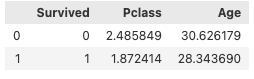
- Use `pandas.DataFrame.rename()` to change the column names of the new dataframe from `'Pclass'` to `'mean_Pclass'` and `'Age'` to `'mean_Age'`. See below. <br>
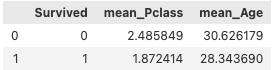


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html

In [16]:
p = titanic_df.groupby('Survived')[['Pclass', 'Age']].mean()
grouped_df = p.reset_index()
grouped_df

,Survived,Pclass,Age
0,0,2.531876,30.626179
1,1,1.950292,28.343690


In [17]:
grouped_df=grouped_df.rename(columns={'Pclass': 'mean_Pclass', 'Age': 'mean_Age'})
grouped_df

,Survived,mean_Pclass,mean_Age
0,0,2.531876,30.626179
1,1,1.950292,28.343690


**5. (1 pt) Use `pandas.DataFrame.all()` to check if all ages in the new data frame <span style="color:red"> *df_validAges*</span> are between 0 and 120.**

Hints: Consider using a filter.

In [19]:
filter=(df_validAges['Age']>0) & (df_validAges['Age']<120 )
age_check=filter.all()
print(f"Are all ages between 0 and 120? {age_check}")

Are all ages between 0 and 120? True


**6. (1 pt)Save all the unique values in the `'Cabin'` column of <span style="color:red"> *df_validAges*</span> to a list and show the list.**

In [21]:
UniqueCabin_list=df_validAges['Cabin'].unique().tolist()
print(UniqueCabin_list)

[nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27', 'D33', 'B30', 'B28', 'C83', 'F33', 'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'D47', 'B86', 'F2', 'C2', 'B19', 'A7', 'C49', 'F4', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'B49', 'D', 'C22 C26', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'E33', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'C52', 'E44', 'A34', 'C104', 'C111', 'C92', 'E38', 'E12', 'E63', 'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'B38', 'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24', 'C90', 'C126', 'C45', 'E8', 'B101', 'C46', 'D30', 'E121', 'D11', 'E77', 'B3', 'D6', 'B82 B84', 'D17', 'A36', 'B69', 'E49', 'D28', 'E17', 'A24', 'C50', 'B42', 'C148']


**7. (2 pt) Plot the histogram of the <span style="color:red"> *df_validAges*</span> dataframe.**
- Set the bin size to be 8, 
- use colors of your choice for the bars and edge of the bars, 
- Use return values of the `matplotpy.plot.hist()` function to find out the exact number of passengers in each bin. 
- Add a title, x-label, y-label for the graph. The grid is optional.<br>
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

<img src = "Lab6_Data/histAges.png" width = 300>

In [23]:
import matplotlib.pyplot as plt

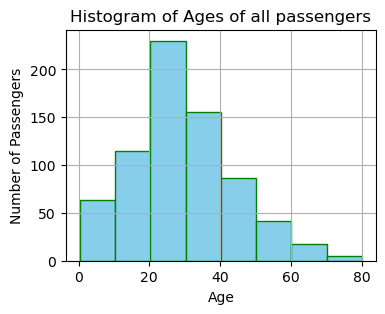

In [24]:
plt.figure(figsize=(4, 3))
plt.hist(df_validAges['Age'], bins=8, edgecolor='green', color='skyblue')

plt.title('Histogram of Ages of all passengers')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')

plt.grid(True)
plt.show()

**8. (3 pts) Apply an operation to a column.**

**8.1 The following example code illustrates applying a function into a column.** 

In [3]:
#Example code showing applying a function into a column.

import numpy as np

def GenderAbbrev(sex):
    if sex == 'female':
        #print(int(age))
        return 'F'
    else:
        return 'M'
  
#create a new column 'GenderAbb' representing gender abbreviations
titanicDF['GenderAbb'] = titanicDF['Sex'].apply(GenderAbbrev )
titanicDF.head()

NameError: name 'titanicDF' is not defined

**8.2 Complete the following tasks:**

1. Define a function that returns a string based on the parameter `age`. Specifically, 
- return 'Seniors' if age is 50 or higher <br>
- eturn 'Children' if age is lower than 18 <br>
- return 'Adults' if age is between 18 and 49, inclusive on both ends.

2.Use the `Pandas.Series.apply()` function to apply the above function to the column `'Age'` of dataframe <span style='color:red'>**df_validAges**</span>, which you created in Problem 3 above. 

3. Save the results in a new column named `'AgeGroup'`. <br>
Make sure to double check that `df_validAges` has no null values for the `'age'` column before this operation.

In [27]:
def categorize_age(Age):
    if Age >= 50:
        return 'Seniors'
    elif Age < 18:
        return 'Children'
    else:
        return 'Adults'

In [28]:
df_validAges = df_validAges.dropna(subset=['Age'])
filter=(df_validAges['Age'].isnull()).sum()
print(filter)

df_validAges['AgeGroup'] = df_validAges['Age'].apply(categorize_age)
print(df_validAges[['Age', 'AgeGroup']].head())

0
    Age AgeGroup
0  22.0   Adults
1  38.0   Adults
2  26.0   Adults
3  35.0   Adults
4  35.0   Adults


**9. (1 pt) Show a summary of descriptive statistics data for the `Age` and `Fare` columns using the `pandas.DataFrame.describe()` function. Keep two digits after the decimal point.** 

In [30]:
descriptive= df_validAges[['Age', 'Fare']].describe()
print(descriptive.round(2))

          Age    Fare
count  714.00  714.00
mean    29.70   34.69
std     14.53   52.92
min      0.42    0.00
25%     20.12    8.05
50%     28.00   15.74
75%     38.00   33.38
max     80.00  512.33


**10. (1 pt) Create a boxplot for columns `Age` and `Fare`. Add a title and y-label for the graph. For better visualization results, set the upper limit of y-axis to be 100.** 

In [32]:
import seaborn as sns

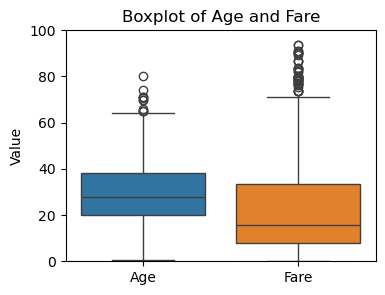

In [58]:
plt.figure(figsize=(4,3)) 
sns.boxplot(data=df_validAges[['Age', 'Fare']])


plt.title('Boxplot of Age and Fare')
plt.ylabel('Value')
plt.ylim(0, 100)
plt.show()

    Age     Fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500


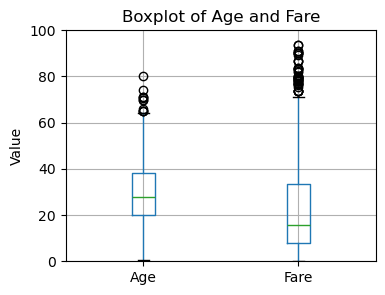

In [60]:
import numpy as np
df1 = df_validAges[['Age', 'Fare']]
print(df1.head())
df1.boxplot(column=['Age', 'Fare'], figsize=(4,3))

plt.title('Boxplot of Age and Fare')
plt.ylabel('Value')
plt.ylim(0, 100)
plt.show()